

# Тема: Метрики качества в задаче регрессии. Оценка обучающей способности модели.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import metrics

### **Задание**: Создайте модель линейной регрессии на sklearn для данных о показателе прогрессирования заболевания диабетом. Оцените качество работы модели по метрикам $R^2$ и RMSE.

Загрузим встроенный датасет о показателе прогрессирования заболевания диабетом.

In [ ]:
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
type(diabetes)

sklearn.utils._bunch.Bunch

Выведем описание рассматриваемоего датасета.

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Обозначим двумерный numpy-массив c признаками за X, а одномерный numpy-массив c целевой переменной за y.

In [ ]:
X = diabetes.data
y = diabetes.target

Посмотрим их размеры:

In [ ]:
X.shape, y.shape

((442, 10), (442,))

Выведем в виде датафрейма первые 5 строк данных совместно с целвой переменной.

In [ ]:
df = pd.DataFrame(data = X, columns = diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Выведем описательную статистику датафрейма:

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


 Разделим данные на обучающую и тестовую части:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Выведем их размеры:

In [ ]:
X_train.shape[0], X_test.shape[0]

(331, 111)

In [ ]:
X.shape[0]

442

Построим модель линейной регрессии для предсказания прогрессирования заболевания. Создадим экземпляр класса LinearRegression и обучем его на обучающих данных.

In [ ]:
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

LinearRegression()

Сделаем предсказание на тестовых данных:

In [ ]:
y_test_pred = model_linreg.predict(X_test)

Оценим обучающую способность, вычислив метрики:

In [ ]:
R2 = metrics.r2_score(y_test,y_test_pred)
R2

0.4849058889476756

In [ ]:
RMSE = metrics.root_mean_squared_error(y_test,y_test_pred)
RMSE

53.369566710321955

Вывод по качеству модели: Модель довольно плохо описывает данные.

### 1. Загрузите данные о показателе зарплаты в зависимости от опыта работы. Выведите первые 5 строк датафрейма и его размеры.
Указание: Данные можно скачать тут: [salary_data](https://www.kaggle.com/datasets/ravitejakotharu/salary-datacsv).

In [ ]:
df = pd.read_csv('/content/salary_data.csv')
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.shape

(30, 2)

### 2. Разделите данные _X_ и целевую переменную y. Сделайте так, чтобы _X_ был двумерным numpy-массивом (вектор-столбцом), а _y_ - одномерным numpy-массивом.

In [ ]:
X = df['YearsExperience'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y = df['Salary'].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### 3.Визуализируйте загруженные данные на диаграмме рассеивания. Сделайте вывод о том, можно ли для этих данных строить линейную модель.

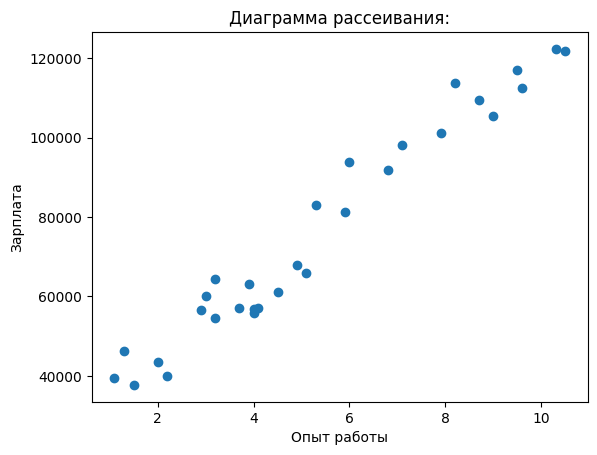

In [ ]:
plt.scatter(X, y)
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата')
plt.title('Диаграмма рассеивания:')
plt.show()

### 4. Разделите данные на обучающую и тестовую части. Выведите их размеры. Визуализируйте данные на диаграмме рассеивания, подкрасив обучающую и тестовую части разным цветом.
Указание: Для разделения данных на две части воспользуйтесь [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). В тестовую часть отправьте 20% наблюдений, для этого задайте параметр test_size = 0.2. Также зафиксируйте random_state=0 для воспроизводимости разбиения.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [ ]:
X_train.shape[0], X_test.shape[0]

(24, 6)

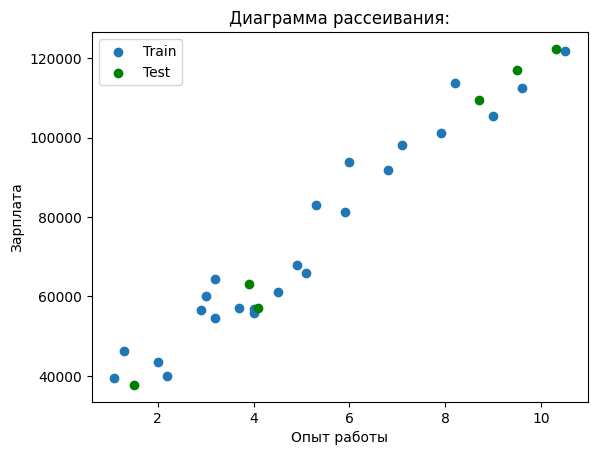

In [ ]:
plt.scatter(X_train, y_train, label = "Train")
plt.scatter(X_test, y_test, label = "Test", color = "g")
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата')
plt.title('Диаграмма рассеивания:')
plt.legend()
plt.show()

### 5. Постройте модель линейной регрессии для предсказания размера заработной платы. Выведите, полученные коэффициенты линии регрессии.
Указение: Создайте класс LinearRegression и обучите модель на тренировочных данных.

In [ ]:
LinReg = LinearRegression()

In [ ]:
LinReg.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinReg.intercept_

26780.09915062818

In [ ]:
LinReg.coef_

array([9312.57512673])

### 6.Постройте на одном графике найденную линию регрессии и диаграмму рассеивания, подкрасив обучающую и тестовую части разным цветом.

In [ ]:
x = np.linspace(min(X), max(X), 100)

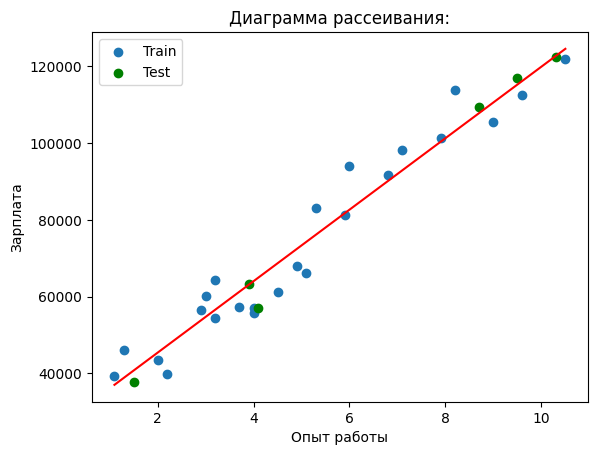

In [ ]:
plt.scatter(X_train, y_train, label = "Train")
plt.scatter(X_test, y_test, label = "Test", color="g")
plt.plot(x, LinReg.predict(x), color="r")
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата')
plt.title('Диаграмма рассеивания:')
plt.legend()
plt.show()

### 7. Сделайте предсказание на тестовых данных. Визуализируйте диаграмму рассеивания истинных и предсказанных значений целевой переменной для тестовых данных и линию идеального их расположения (биссектрису) на одном графике. Сделайте вывод по графику о точности предсказания.

In [ ]:
y_test_pred = LinReg.predict(X_test)
y_test_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

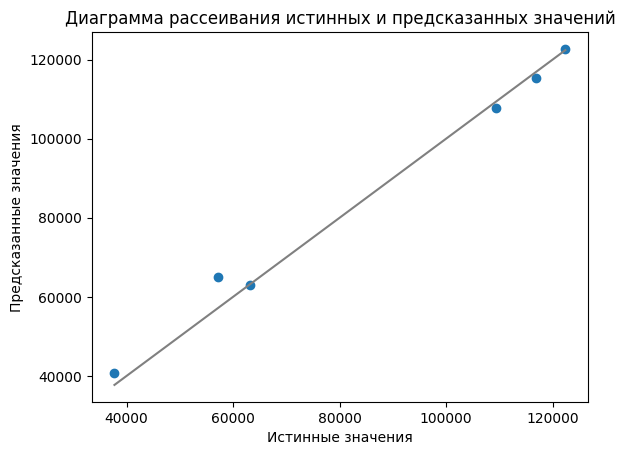

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.title("Диаграмма рассеивания истинных и предсказанных значений")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
l = np.linspace(min(y_test), max(y_test), 100)
plt.plot(l, l, color = "grey")
plt.show()

### 8. Напишите функцию своими руками, вычисляющую коэффициент детерминации. Вычислите коэффициент детерминации с помощью неё и с помощью библиотечной функции.
Указание: Коэффициент детерминации $R^2 = 1 - \frac{\sum_{i=1}^{n} ({y}_i - \hat{y}_i)^2}{\sum_{i=1}^{n} ({y}_i - \overline{y})^2}$. Пусть функция принимает два вектора - истинные и предсказанные значения. Используйте библиотечную функцию [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) и метод _.score(X_test, y_test)_. Убедитесь, что значения совпадают.

In [ ]:
def r2(y_true, y_pred):
  s1 = np.sum((y_true - y_pred)**2)
  s2 = np.sum((y_true - np.mean(y_true))**2)
  return 1-s1/s2

In [ ]:
r2(y_test, y_test_pred)

0.988169515729126

In [ ]:
metrics.r2_score(y_test, y_test_pred)

0.988169515729126

In [ ]:
LinReg.score(X_test, y_test)

0.988169515729126

### 9. Напишите функцию своими руками, вычисляющую ошибку MSE. Вычислите MSE с помощью неё и с помощью библиотечной функции.
Указание: $MSE = \frac{1}{n}\sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2$. Используйте библиотечную функцию [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [ ]:
def mse(y, y_pred):
  return np.mean((y - y_pred)**2)
mse(y_test, y_test_pred)


12823412.298126549

In [ ]:
metrics.mean_squared_error(y_test, y_test_pred)

12823412.298126549

### 10. Вычислите метрику _RMSE_, написав функцию своими руками и используя библиотечную функцию.
Указание: $RMSE =\sqrt{ \frac{1}{n}\sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2}$. Библиотечной функции, соответствующей этой формуле - нет, возьмите корень из MSE.  Используйте функцию [root_mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html).

In [ ]:
def rmse(y, y_pred):
  return (np.mean((y - y_pred)**2))**0.5
rmse(y_test, y_test_pred)

3580.979237321343

In [ ]:
metrics.root_mean_squared_error(y_test, y_test_pred)

3580.979237321343

### 11. Вычислите метрику _MAE_, написав функцию своими руками и используя библиотечную функцию.
Указание: $MAE = \frac{1}{n}\sum_{i=1}^n \left|y_i - \widehat{y}_i\right|$. Используйте функцию [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html).

In [ ]:
def mae(y, y_pred):
  return np.mean(np.abs(y-y_pred))

In [ ]:
mae(y_test, y_test_pred)

2446.1723690465055

In [ ]:
metrics.mean_absolute_error(y_test, y_test_pred)

2446.1723690465055

### 12. Вычислите метрику _MAPE_, написав функцию своими руками и используя библиотечную функцию.
Указание: $MAPE = \frac{1}{n}\sum_{i=1}^n \frac{\left|y_i - \hat{y}_i\right|}{\left |y_i \right |}$. Используйте функцию [mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html).

In [ ]:
def mape(y, y_pred):
  return np.mean(np.abs(y-y_pred)/np.abs(y))

In [ ]:
mape(y_test, y_test_pred) * 100

4.2009635296206715

In [ ]:
metrics.mean_absolute_percentage_error(y_test, y_test_pred) * 100

4.2009635296206715

### 13. Загрузите встроенные данные о показателе медианной стоимости дома в округах Калифорнии. Выведите описание датасета. Обозначьте двумерный numpy-массив c признаками за X, а одномерный numpy-массив c целевой переменной за y. Выведите их размеры.
Указание: Используйте встроенные данные [fetch_california_housing](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_california_housing.html).

In [ ]:
california_housing = fetch_california_housing()

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
X = california_housing.data
y = california_housing.target

In [ ]:
X.shape, y.shape

((20640, 8), (20640,))

### 14. Выведите первые пять строк данных в виде датафрейма, добавив в него и столбец с целевой переменной. Выведите описательную статистику этого датафрейма. Убедитесь, что все значения в датафрейме числовые и данные не имеют пропусков. Выведите количество уникальных значений целевой переменной.

In [ ]:
df = pd.DataFrame(data = X, columns = california_housing.feature_names)
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
if df.applymap(lambda x: isinstance(x, (int, float))).all().all():
    print("Все значения числовые.")
else:
    print("Есть нечисловые значения.")

if df.isnull().any().any():
    print("Есть пропущенные значения.")
else:
    print("Нет пропущенных значений.")


Все значения числовые.
Нет пропущенных значений.


<ipython-input-58-9bc3884071c4>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if df.applymap(lambda x: isinstance(x, (int, float))).all().all():


In [ ]:
df['target'].nunique()

3842

### 15. Разделите данные на обучающую и тестовую части. Выведите их размеры.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
X_train.shape[0], X_test.shape[0]

(15480, 5160)

In [ ]:
X.shape[0]

20640

### 16. Постройте модель линейной регрессии для предсказания медианной стоимости дома в округах Калифорнии. Выведите, полученные коэффициенты  гиперплоскости.
Указение: Создайте класс LinearRegression и обучите модель на тренировочных данных.

In [ ]:
LinReg = LinearRegression()

In [ ]:
LinReg.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinReg.intercept_

-37.02782758526917

In [ ]:
LinReg.coef_

array([ 4.47600069e-01,  9.56752596e-03, -1.24755956e-01,  7.94471254e-01,
       -1.43902596e-06, -3.44307993e-03, -4.18555257e-01, -4.33405135e-01])

### 17. Сделайте предсказание на тестовых данных. Визуализируйте диаграмму рассеивания истинных и предсказанных значений целевой переменной для тестовых данных и линию идеального их расположения. Сделайте предположение о точности предсказания.

In [ ]:
y_test_pred = LinReg.predict(X_test)
y_test_pred

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

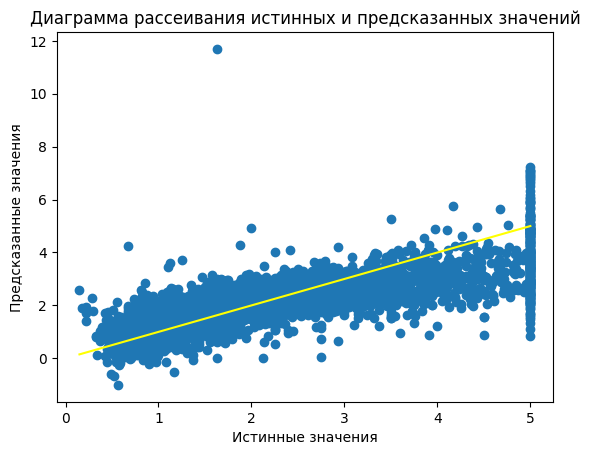

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.title("Диаграмма рассеивания истинных и предсказанных значений")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
l = np.linspace(min(y_test), max(y_test), 100)
plt.plot(l, l, color = "yellow")
plt.show()

### 18. Вычислите метрики: коэффициент детерминации и ошибка RMSE. Сделайте вывод о качестве работы модели линейной регрессии для этих данных.

In [ ]:
R2 = metrics.r2_score(y_test,y_test_pred)
R2

0.5910509795491357

In [ ]:
RMSE = metrics.root_mean_squared_error(y_test,y_test_pred)
RMSE

0.7356145375446764